This guide was writen by Jonathan Skaggs and is intended to show how to use the GraphDataBaseManagerv2

In [3]:
# imports
from GraphDatabaseManager_v2 import GraphManager
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
from DatabaseManager import DatabaseManager

In [4]:
# This part was left over from Dr Goodrich's work
# Exercise the necessary parts of the Database manager
database = DatabaseManager('datasets/suicide_rates_by_category.csv')
database.showUniqueNodesOfType('generation')
database.cleanDatabase()
database.showUniqueNodesOfType('generation')
database.binCategory('suicides_per_100k', binlist=[0, 25, 75, 100, 125, 150, 300])
database.showUniqueNodesOfType('suicides_per_100k_bins')
database.printDatabaseOverview()
del database

generation
Generation X    6408
Silent          6364
Millenials      5844
Boomers         4990
Generation Z    1470
dtype: int64
generation
Generation X    6408
Silent          6364
Millenials      5844
Boomers         4990
Generation Z    1470
dtype: int64
suicides_per_100k_bins
0-25       21712
25-75       2959
75-100       317
100-125       60
125-150       14
150-300       14
dtype: int64
   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
4  Albania  1987    male  25-34 years            9      274300   
6  Albania  1987  female  35-54 years            6      278800   

   suicides_per_100k country-year  HDI_for_year  gdp_for_year  gdp_per_capita  \
0               6.71  Albania1987           NaN    2156624900             796   
1               5.19  Albania1987           N

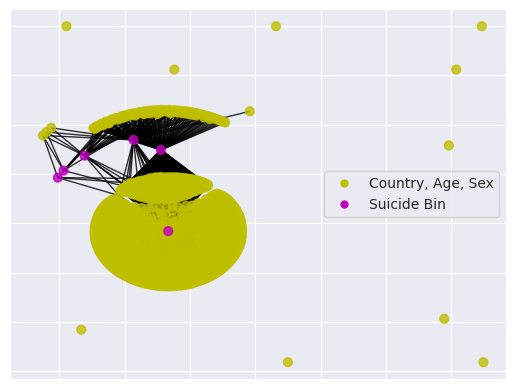

In [6]:
# Extract a knowledge graph
graph_database = GraphManager('datasets/suicide_rates_by_category.csv')
G = graph_database.getGraph_of_Database()
pos = nx.nx_agraph.graphviz_layout(G, prog='neato')
color_map = graph_database.getColormap_by_Nodetype()

# Plot figure
plt.figure(1)
nx.draw_networkx(G, pos, node_color=color_map, alpha=0.8, node_size=40, with_labels=False)
ax = plt.gca()
age_line, = ax.plot(-np.inf, -np.inf, 'y.', markersize=10)
age_line.set_label('Country, Age, Sex')
year_line, = ax.plot(-np.inf, -np.inf, 'm.', markersize=10)
year_line.set_label('Suicide Bin')
ax.legend()
plt.show()

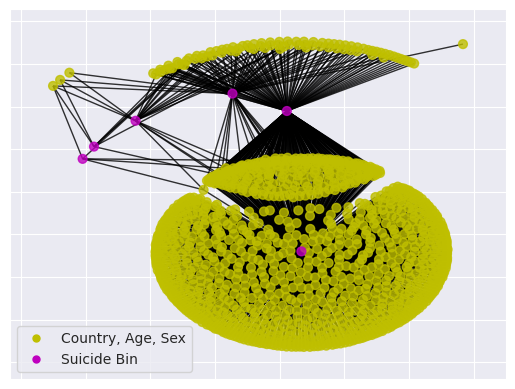

In [7]:
# Extract a knowledge graph - but this time lets only look at the largest component
graph_database = GraphManager('datasets/suicide_rates_by_category.csv')
G = graph_database.getGraph_of_Database()
G = graph_database.extractLargestComponent(G)  # let's only worry about the largest component!
pos = nx.nx_agraph.graphviz_layout(G, prog='neato')
# I edited the following function to use any graph (ie the largest component) by default will use the whole graph
color_map = graph_database.getColormap_by_Nodetype(G)

# Plot figure of largest component
plt.figure(1)
nx.draw_networkx(G, pos, node_color=color_map, alpha=0.8, node_size=40, with_labels=False)
ax = plt.gca()
age_line, = ax.plot(-np.inf, -np.inf, 'y.', markersize=10)
age_line.set_label('Country, Age, Sex')
year_line, = ax.plot(-np.inf, -np.inf, 'm.', markersize=10)
year_line.set_label('Suicide Bin')
ax.legend()
plt.show()

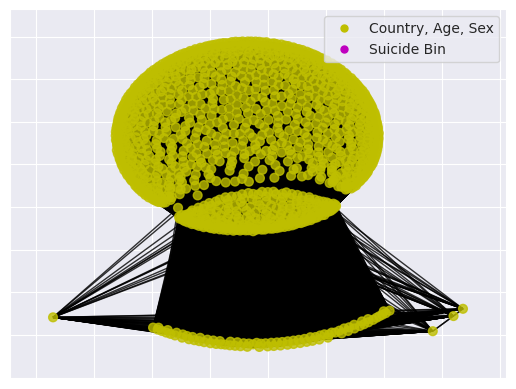

In [8]:
# We can also project out one of the categories ie 'country, age, sex', or 'suicides_per_100k_bins'
H = graph_database.extractProjectionGraph('country, age, sex')
H = graph_database.extractLargestComponent(H)  # let's only worry about the largest component!
pos = nx.nx_agraph.graphviz_layout(H, prog='neato')
# I edited the following function to use any graph (ie the largest component) by default will use the whole graph
color_map = graph_database.getColormap_by_Nodetype(H)

# Plot figure of largest component
plt.figure(1)
nx.draw_networkx(H, pos, node_color=color_map, alpha=0.8, node_size=40, with_labels=False)
ax = plt.gca()
age_line, = ax.plot(-np.inf, -np.inf, 'y.', markersize=10)
age_line.set_label('Country, Age, Sex')
year_line, = ax.plot(-np.inf, -np.inf, 'm.', markersize=10)
year_line.set_label('Suicide Bin')
ax.legend()
plt.show()

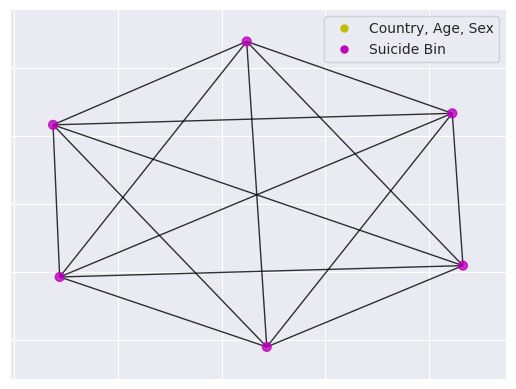

In [9]:
# This time lets extract out 'suicides_per_100k_bins'
H = graph_database.extractProjectionGraph('suicides_per_100k_bins')
H = graph_database.extractLargestComponent(H)  # let's only worry about the largest component!
pos = nx.nx_agraph.graphviz_layout(H, prog='neato')
# I edited the following function to use any graph (ie the largest component) by default will use the whole graph
color_map = graph_database.getColormap_by_Nodetype(H)

# Plot figure of largest component
plt.figure(1)
nx.draw_networkx(H, pos, node_color=color_map, alpha=0.8, node_size=40, with_labels=False)
ax = plt.gca()
age_line, = ax.plot(-np.inf, -np.inf, 'y.', markersize=10)
age_line.set_label('Country, Age, Sex')
year_line, = ax.plot(-np.inf, -np.inf, 'm.', markersize=10)
year_line.set_label('Suicide Bin')
ax.legend()
plt.show()

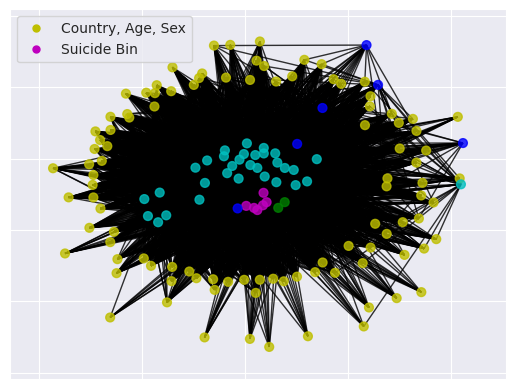

In [11]:
# If you wanted to use a different set of nodes (from the dataframes columns) you can pass into the GraphManager
graph_database = GraphManager('datasets/suicide_rates_by_category.csv', node_types=[['country'], ['age'], ['sex'], ['year'], ['suicides_per_100k_bins']])
G = graph_database.getGraph_of_Database()
G = graph_database.extractLargestComponent(G)
pos = nx.nx_agraph.graphviz_layout(G, prog='neato')
color_map = graph_database.getColormap_by_Nodetype(G)

# Plot figure of largest component
plt.figure(1)
nx.draw_networkx(G, pos, node_color=color_map, alpha=0.8, node_size=40, with_labels=False)
ax = plt.gca()
age_line, = ax.plot(-np.inf, -np.inf, 'y.', markersize=10)
age_line.set_label('Country')
year_line, = ax.plot(-np.inf, -np.inf, 'm.', markersize=10)
year_line.set_label('Age')
age_line, = ax.plot(-np.inf, -np.inf, 'c.', markersize=10)
age_line.set_label('Sex')
year_line, = ax.plot(-np.inf, -np.inf, 'b.', markersize=10)
year_line.set_label('Year')
year_line, = ax.plot(-np.inf, -np.inf, 'b.', markersize=10)
year_line.set_label('Suicide Bin')
ax.legend()
plt.show()

# Other things to note:
The graph is weighted so that you can use the NetworkX functions with the weight='weight' parameter to test different metrics.  If you wanted to use a unweighted graph (most metrics do this by default) you can use the parameter weight=None.

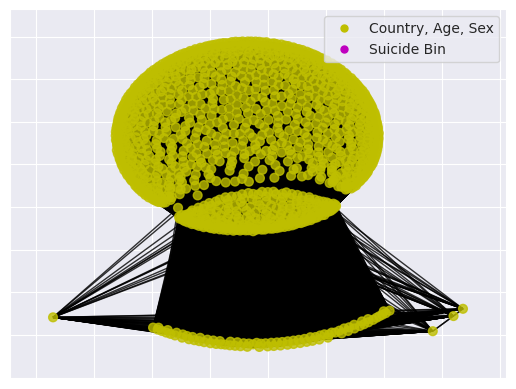

Degree Histogram: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 42, 0, 0, 0, 0, 0, 0, 25, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
graph_database = GraphManager('datasets/suicide_rates_by_category.csv', node_types=[['country', 'age', 'sex'], ['suicides_per_100k_bins']])
G = graph_database.getGraph_of_Database()
H = graph_database.extractProjectionGraph('country, age, sex')
H = graph_database.extractLargestComponent(H)
pos = nx.nx_agraph.graphviz_layout(H, prog='neato')
color_map = graph_database.getColormap_by_Nodetype(H)

# Plot figure of largest component - same as above I just wanted you to visually see what graph we are working with
plt.figure(1)
nx.draw_networkx(H, pos, node_color=color_map, alpha=0.8, node_size=40, with_labels=False)
ax = plt.gca()
age_line, = ax.plot(-np.inf, -np.inf, 'y.', markersize=10)
age_line.set_label('Country, Age, Sex')
year_line, = ax.plot(-np.inf, -np.inf, 'm.', markersize=10)
year_line.set_label('Suicide Bin')
ax.legend()
plt.show()

print("Degree Histogram: ")
hist = nx.degree_histogram(H)
print(hist)
# I had a hard time appropriately binning
# fig, ax = plt.subplots(figsize =(10, 7))
# ax.hist(hist, bins=np.arange(len(hist)))
# plt.show()

# Ideas on places to start:
- Check that the extractBipartiteGraph function is still working in GraphDataBaseManagerv2
- Pick a graph and start running some metrics and seeing what you think is interesting
- something else, haha these are just my suggestions